# A hand-made chi2 fit (incomplete - edit where indicated to make it work)

You can view these sheets on github, but to modify them, you'll need to a version of jupyter. How to install it is explained here: http://jupyter.readthedocs.io/en/latest/install.html.
If you want to use the functions defined below to generate your own distributions, you need to compile them first. Easiest done by clicking (once have opened this as jupyter notebook): Kernel -> Restart & Run All. (Alternatively, you can use the >| button to click your way through, but you need to start from the beginning to have access to all functions defined on this sheet). Have fun!

Let's generate a few distributions and calculate the mean, mode, median for each.
Start by importing the relevant libraries

In [1]:
from math import *
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

Let's generate a distribution we want to fit. We take an exponential

In [2]:
def generateExpo(tau=1, Nevents=10000, randomSeed=-1):
    if randomSeed >=0: np.random.seed(randomSeed)
    expoSample = np.random.exponential(scale = tau, size=Nevents)
    return expoSample

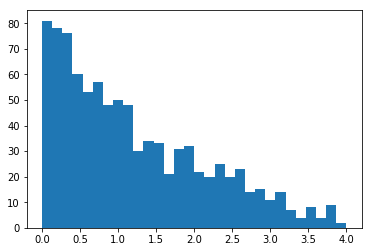

In [3]:
Nevents=1000
Nbins=30
histoRange=(0,4)
expoSample = generateExpo(1.5, Nevents)
timeHisto=plt.hist(expoSample, Nbins, histoRange) # make histogram
plt.show()

Define the theoretical distribution

In [4]:
def expo(t, tau):
    return np.exp(-t/tau)/tau
def expoIntegral(t, tau, integRange=(0.0, -999.9)):
    lower=np.exp(-integRange[0]/tau)
    upper=0
    if integRange[1] > -999.8: upper = np.exp(-integRange[1]/tau)
    return lower-upper
def expoNorm(t, tau, integRange):
    return expo(t, tau)/expoIntegral(t, tau, integRange)

We could continue with these  functions, but it turns out to be more convenient to cast them into a class. The reason is that it allows us to write routines like draw(), below, that will plot any function, no matter how many parameters, as long as the class has the __call__ and the mini, maxi routines defined.

In [5]:
class expoClass:
    def __init__(self, tau=1.5, funcRange=(0.0, 100)):
        self._tau=tau
        self._range=funcRange
    def setTau(self,tau):
        self._tau=tau
    def interval(self):
        return self._range
    def mini(self):
        return self._range[0]
    def maxi(self):
        return self._range[1]
    def range(self):
        return self._range
    def __call__(self, t):
        #return expo(t, self._tau)
        return expoNorm(t, self._tau, self._range)

...let's create an instance of our expoClass:

In [6]:
timeFct = expoClass(1.6, (0, 4))  
# timeFct is now defined such that timeFct(t) will call whetever is in 
# the __call__ routine of expoClass, currently return expo(t, self._tau)

... and draw it:

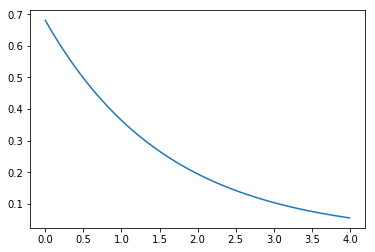

In [7]:
def draw(somethingLikeExpoClass, scale=1, numPoints=1000):
    mini=somethingLikeExpoClass.mini()
    maxi=somethingLikeExpoClass.maxi()
    tArray=np.arange(mini, maxi, (maxi-mini)/numPoints)
    plt.plot(tArray,scale*somethingLikeExpoClass(tArray))

draw(timeFct)

Now we define a function that calculates the chi2 between the histogram and the theoretical distribution
# edit the function below to calculate the chi-squared

In [12]:
def chi2(h, functionClass):
    ## Note that the theoretical function is normalised to one. 
    ## To get the expected number of events, we 
    ## will need the total number of events, and the binwidth.
    N=fsum(h[0])
    chi2sum=0
    for Nbin, bin_low, bin_up in zip(h[0], h[1], h[1][1:]):
        binCentre=0.5*(bin_low + bin_up)
        binWidth= bin_up - bin_low
        #theory=N*binWidth*functionClass(binCentre) # <<<< uncomment this line and make sure you understand it
        measured=Nbin
        # error_squared= # <<<<<<<<<<<<<<<<<<<<<<< uncomment and complete this line
        # chi2sum +=     # <<<<<<<<<<<<<<<<<<<<<<< uncomment and complete this line
    return np.random.rand()*functionClass(binCentre) + 1 # <<<<<<<<<<<<<<<<<<<<<<< remove this line!!!!
#    return chi2sum      # <<<<<<<<<<<<<<<<<<<<<<< uncomment this line
        

Now we have all the ingredients to calculate the chi2. Let's do it:

In [13]:
chi2(timeHisto,timeFct)

array([1.03295308, 1.03298064, 1.0330082 , 1.03303575, 1.03306331,
       1.03309087, 1.03311842, 1.03314597, 1.03317353, 1.03320108,
       1.03322863, 1.03325618, 1.03328373, 1.03331128, 1.03333883,
       1.03336637, 1.03339392, 1.03342147, 1.03344901, 1.03347655,
       1.0335041 , 1.03353164, 1.03355918, 1.03358672, 1.03361426,
       1.0336418 , 1.03366933, 1.03369687, 1.03372441, 1.03375194,
       1.03377947, 1.03380701, 1.03383454, 1.03386207, 1.0338896 ,
       1.03391712, 1.03394465, 1.03397218, 1.0339997 , 1.03402723,
       1.03405475, 1.03408227, 1.03410979, 1.03413731, 1.03416483,
       1.03419235, 1.03421986, 1.03424738, 1.03427489, 1.0343024 ,
       1.03432992, 1.03435743, 1.03438494, 1.03441244, 1.03443995,
       1.03446746, 1.03449496, 1.03452246, 1.03454996, 1.03457746,
       1.03460496, 1.03463246, 1.03465996, 1.03468745, 1.03471495,
       1.03474244, 1.03476993, 1.03479742, 1.03482491, 1.03485239,
       1.03487988, 1.03490736, 1.03493485, 1.03496233, 1.03498

Let's try different values of tau

In [14]:
timeFct.setTau(1)
print(chi2(timeHisto, timeFct))
timeFct.setTau(1.5)
print(chi2(timeHisto, timeFct))
timeFct.setTau(2)
print(chi2(timeHisto, timeFct))

1.010314359005178
1.026881140192327
1.0509414110935897


That was informative, as it suggests the fit value is somewhere between 1 and 2. But we need to make this a bit more systematic:

min at  1.3  +  -999.9  -  -999.9 
with chi2 at min of  1.029556275355972


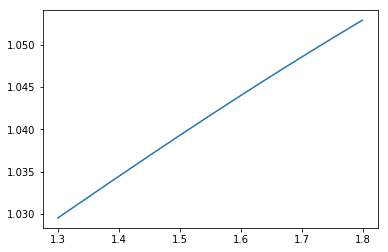

In [15]:
class Chi2Scan:
    def __init__(self, h, fcn):
        self._h = h
        self._fcn =fcn
        self._tArray=[]
        self._chi2Array=[]
        self._minChi2=-999.9
        self._taumin=-999.9
        self._error_low=-999.9
        self._error_high=-999.9
    def Chi2_of_tau(self, tau):
        self._fcn.setTau(tau)
        return chi2(self._h, self._fcn)

    def scan(self, interval, numsteps):
        stepsize = (interval[1]-interval[0])/numsteps
        self._tArray=np.arange(interval[0], interval[1], stepsize)
        self._chi2Array=self.Chi2_of_tau(self._tArray)
        
    def plot(self, interval=(0,0), numsteps=0):
        if numsteps > 0: # only then re-do scan
            self.scan(interval, numsteps)
        plt.plot(self._tArray,self._chi2Array)
        plt.show
        
    def findMin(self, interval=(0,0), numsteps=0):
        if numsteps > 0: # only then re-do scan
            self.scan(interval, numsteps)
        self._minChi2=self._chi2Array[0]
        self._taumin=self._tArray[0]
        for time, chi2 in zip(self._tArray, self._chi2Array):
            if chi2 < self._minChi2:
                self._minChi2=chi2
                self._taumin=time
        return self._taumin, self._minChi2
    
    def findErrors(self, interval=(0,0), numsteps=0):
        if numsteps > 0: # only then re-do scan
            self.scan(interval, numsteps)
            findMin()
        shiftedChi2 = self._chi2Array - self._minChi2 - 1
        prevChi2=shiftedChi2[0]
        prevTime=self._tArray[0]
        for time, chi2 in zip(self._tArray, shiftedChi2):
            if prevChi2*chi2 < 0:
                if time < self._taumin:
                    self._error_low = -(0.5*(time + prevTime)-self._taumin)
                if time > self._taumin:
                    self._error_high = 0.5*(time + prevTime)-self._taumin
            prevChi2=chi2
            prevTime=time

        return self._error_low, self._error_high

TimeChi2Scan=Chi2Scan(timeHisto, timeFct)
TimeChi2Scan.scan((1.3,1.8), 1000)   ## <<<<<<<< this scan scans through 1000 points - check if this is enough.
taumin, chi2min = TimeChi2Scan.findMin()
err_lo, err_hi = TimeChi2Scan.findErrors()
TimeChi2Scan.plot()

print("min at ", taumin, " + ", err_hi, " - ", err_lo, "\nwith chi2 at min of ", chi2min)



Let's write a function that can draw the data with the fit superimposed to see if it makes any sense:

In [16]:
def drawHistoWithFit(histo, fit):
    fig, ax = plt.subplots()
    #plt.plot(timeHisto[1][0:-1], timeHisto[0][0:], drawstyle="steps-pre")#, align='edge')
    error=np.sqrt(timeHisto[0])
    #plt.bar([0,1,2, 9], [9, 10, 11, 90], align='edge')
    ax.errorbar(timeHisto[1][0:-1], timeHisto[0][0:],
       yerr=error,fmt="r+")
    N=fsum(timeHisto[0])
    binwidth=timeHisto[1][1]-timeHisto[1][0]
    draw(timeFct, scale=N*binwidth)
    plt.show()

and use it - down't forget to set tau to the fit result:

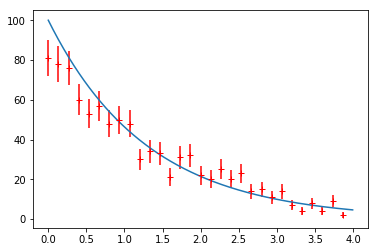

In [17]:
timeFct.setTau(taumin)
drawHistoWithFit(timeHisto, timeFct)

pull study:

In [18]:
def pullStudy(func=timeFct, numEvents=1000, numExperiments=100
              , trueTau=1.5, scanrange=(0,0), numTimeBins=50):
    pull=[]
    pullSum=0.0
    pullSumSq=0.0
    for counter in range(numExperiments):
        simulatedData = generateExpo(trueTau, numEvents)
        histo=plt.hist(simulatedData, numTimeBins, timeFct.range()) # make histogram
        scanner=Chi2Scan(histo, func)
        
        localScanRange=scanrange
        if(scanrange[0] >= scanrange[1]): # if scanrage not set, make one up
            scanmin = trueTau - 8*trueTau/sqrt(numEvents)
            scanmax = trueTau + 8*trueTau/sqrt(numEvents)
            if trueTau - scanmin < 1: scanmin = trueTau-1
            if scanmax - trueTau < 1: scanmax = trueTau+1
            localScanRange=(scanmin, scanmax)
        
        scanner.scan(localScanRange, 1000)
        taumin, chi2min = scanner.findMin()
        err_lo, err_hi = scanner.findErrors()
    # note: I'll take the average error, but taking upper and lower into account
    # seperately, depending on whether your fit is above or below the true value,
    # is more accurate - something you might want to implement.
        err = 0.5*(err_lo + err_hi)
        thisPull = (taumin-trueTau)/err
        pull.append(thisPull)
        pullSum += thisPull
        pullSumSq += thisPull**2
        
    mean=pullSum/numExperiments
    var=pullSumSq/numExperiments - mean*mean
    sigma=np.sqrt(var)
    sigma_on_mean=sigma/sqrt(numExperiments)
    sigma_on_sigma=sigma/sqrt(2*numExperiments)
    print("mean pull (should be 0)", mean, " +- ", sigma_on_mean)
    print("sigma pull (should be 1)", sigma, " +- ", sigma_on_sigma)
    plt.clf()
    plt.hist(pull, 20, (-5, 5))
    plt.show()

mean pull (should be 0) 0.0010001000100010005  +-  2.0579515874459976e-12
sigma pull (should be 1) 2.0579515874459978e-11  +-  1.4551915228366853e-12


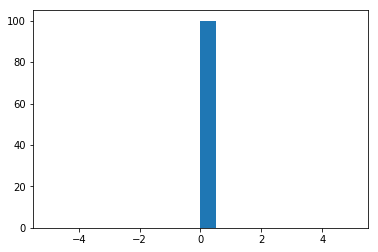

In [19]:
pullStudy(timeFct, numEvents=1000, numExperiments=100
          , trueTau=1.5, scanrange=(0.5, 3), numTimeBins=100) 
# why might you get a bias in this fit? 

# With the default settings, you will get a bias in the fit. 
# Why? How can you reduce it?